## Stroke Prediction Using Machine Learning Predictive Modeling

### Project Introduction

This project focuses on **predicting the occurrence of stroke** using clinical and demographic data. Stroke is a serious medical condition, and early identification of high-risk individuals can significantly improve outcomes. The dataset contains patient information such as age, BMI, gender, marital status, work type, residence type, and lifestyle factors like smoking.  

The goal of this project is to preprocess the data, handle missing values and class imbalance, explore patterns through visualization, and build predictive models using machine learning algorithms. Model performance is evaluated and best appropiate model will be selected.

The data is publicly available dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

 essential Python libraries are imported:
- **pandas** for data manipulation and analysis  
- **numpy** for numerical operations  
- **matplotlib.pyplot** and **seaborn** for data visualization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset
The dataset **'stroke data.csv'** is loaded using `pandas.read_csv()` and stored in the variable **df**.  
Displaying **df** shows the first few rows to get an overview of the data structure and columns.

In [2]:
df = pd.read_csv('stroke data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Checking for Missing Values
Check for null (missing) values in each column using `df.isnull().sum()`.  
It prints the total count of missing entries per column to identify incomplete data that may need cleaning.

In [3]:
# Check for null values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


It shows bmi column has 201 null values.

Missing values in the **'bmi'** column are replaced with the column’s median value using `fillna()`.  
This approach preserves data distribution and reduces the effect of outliers compared to using the mean.


In [4]:
# Fill missing BMI values with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9092\2458674274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


After filling the missing **'bmi'** values, this step verifies that all missing data have been handled properly.  
It reprints the count of null values in each column to confirm data completeness.

In [5]:
# Check for null values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Checking Data Types
Displays the data type (`int64`, `float64`, `object`, etc.) of each column in the dataset.  
This helps identify which features are numerical or categorical before further analysis or preprocessing.

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Gender, ever_married, work_type, Residence_type and smoking_status columns are object types.

These columns are converted to the **'category'** data type.  
This conversion optimizes memory usage and prepares the data for encoding in later steps.

In [7]:
df['gender']=df['gender'].astype('category')
df['ever_married']=df['ever_married'].astype('category')
df['work_type']=df['work_type'].astype('category')
df['Residence_type']=df['Residence_type'].astype('category')
df['smoking_status']=df['smoking_status'].astype('category')

In [8]:
#check the data type again after type conversion
df.dtypes

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

All columns have correct data types now. 

### Stroke Distribution Visualization
A **count plot** is created to show the distribution of the target variable **'stroke'**.  
This visualization helps identify class imbalance between patients who had a stroke and those who did not.

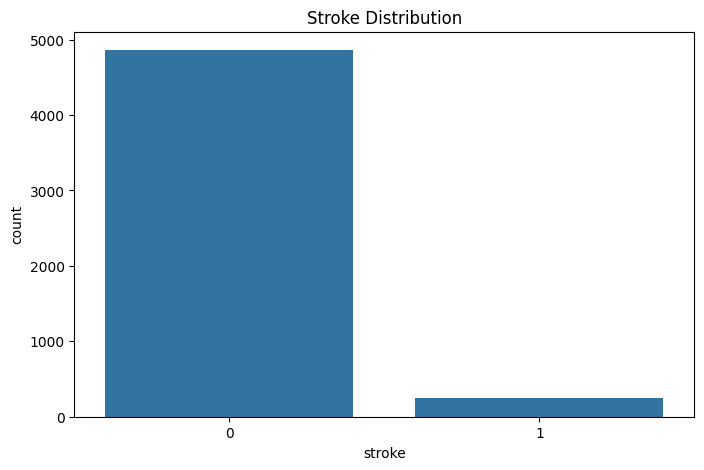

In [9]:
# 3. Data Visualization

plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()

It shows class imbalance in which the number of presence of stroke (1) is much lower than the absence.

### Correlation Heatmap
A **heatmap** is plotted to visualize correlations between numerical features.  
- **Annot=True** displays correlation values  
- **Coolwarm colormap** highlights strong positive (red) and negative (blue) correlations  
This helps quickly identify highly correlated features for further analysis or modeling.

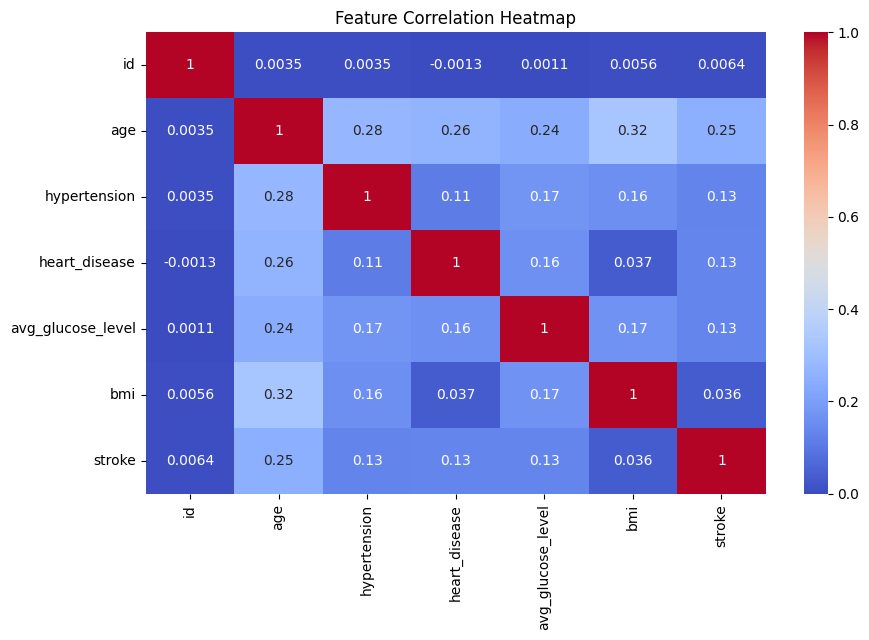

In [10]:
# Correlation Heatmap (numeric features only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

From the heapmap, there is no strong correlation found between these variables.

### BMI vs Stroke Boxplot
A **boxplot** is used to compare the distribution of **BMI** across stroke and non-stroke patients.  
This helps detect differences, outliers, and trends in BMI related to stroke occurrence.

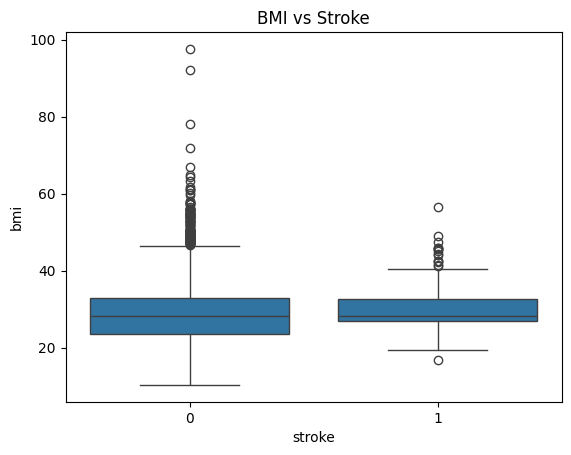

In [11]:
# Boxplot of BMI vs Stroke
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI vs Stroke')
plt.show()

The boxplot shows some outliers in both stroke and non-stroke groups.  
Since these extreme BMI values are clinically plausible and relevant for prediction, they are retained in the dataset for model training.

### Age vs Stroke Boxplot
A **boxplot** is plotted to compare the distribution of **age** between stroke and non-stroke patients.  
This helps identify trends, age-related patterns, and potential outliers in relation to stroke occurrence.

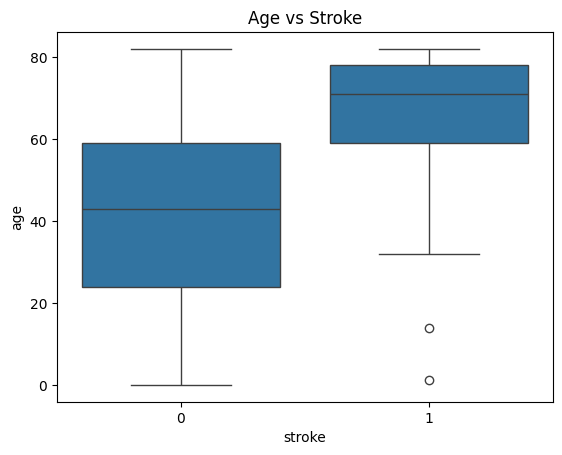

In [12]:
#  Boxplot of age vs Stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs Stroke')
plt.show()

The boxplot shows that most non-stroke patients are aged **20–60**, while stroke patients are mostly **60–80**.  
Two outliers in the stroke group are present but are clinically plausible.

In [13]:
# Drop irrelevant 'id' column
df.drop(['id'], axis=1, inplace=True)

In [14]:
#check the dataframe after removing 'id' column
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Importing Machine Learning Libraries
Essential **scikit-learn** modules are imported for model building and evaluation:  
- **train_test_split**: split data into training and testing sets  
- **LabelEncoder** and **StandardScaler**: encode categorical variables and scale features  
- **SVC**, **DecisionTreeClassifier**, **RandomForestClassifier**: machine learning algorithms for classification  
- **classification_report**, **confusion_matrix**, **accuracy_score**, **precision_score**, **recall_score**, **f1_score**: metrics to evaluate model performance


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Encoding Categorical Variables
Categorical columns (**'gender'**, **'ever_married'**, **'work_type'**, **'Residence_type'**, **'smoking_status'**) are converted to numeric values using **LabelEncoder**.  
This is required for machine learning models that only accept numerical input.

In [16]:
# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])

In [17]:
#check the dataset after label encoding
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [18]:
# check the data types again
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

### Splitting Features and Target
- **X** contains all input features by dropping the target column **'stroke'**  
- **y** contains the target variable **'stroke'**  
This prepares the dataset for model training and evaluation.

In [19]:
# Split features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

### Feature Scaling
The input features **X** are normalized using **StandardScaler** to have zero mean and unit variance.  
Scaling ensures that all features contribute equally to distance-based algorithms like SVM.

In [20]:
# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#check the normalized features (x)
X_scaled

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
         1.00508597, -0.35178071],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
        -0.09898092,  0.58155233],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.47253605,  0.58155233],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.22574463,  0.58155233],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.42370648, -0.35178071],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34577235, -1.28511375]])

### Splitting Data into Training and Test Sets
The dataset is split into **training** and **testing** sets:  
- **80% training** and **20% testing** (`test_size=0.2`)  
- `random_state=42` ensures reproducibility  

Printing the shapes confirms the number of samples in each set.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (4088, 10)
Test shape: (1022, 10)


### Checking Target Distribution
Check the count of each class in the target variable **'stroke'**.  
This helps identify class imbalance in training data, which is important for choosing evaluation metrics and model strategies.

In [23]:
y_train.value_counts()

stroke
0    3901
1     187
Name: count, dtype: int64

The target variable **'stroke'** is highly imbalanced:  
- **3901** samples without stroke (class 0)  
- **187** samples with stroke (class 1)  

This imbalance indicates the need for techniques like SMOTE or class weighting during model training to improve prediction for the minority class.

### Handling Class Imbalance with SMOTE
**SMOTE (Synthetic Minority Over-sampling Technique)** is applied to the training set to balance classes by generating synthetic samples for the minority class.  
This improves model performance on imbalanced datasets without affecting the test set.

In [24]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE only to training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

Recheck the balanced class in training data after applying SMOTE method

In [25]:
y_train.value_counts()

stroke
0    3901
1    3901
Name: count, dtype: int64

It shows the same number of class in target variable, being ready for training. 

### Training Linear SVM
A **Support Vector Machine (SVM)** with a **linear kernel** is trained on the scaled and balanced training data.  
SVM finds the optimal hyperplane that separates the classes in the feature space.

In [26]:
#Train Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Making Predictions with Linear SVM
The trained **linear SVM** model is used to predict the target variable **'stroke'** on the test set.  
The predictions are stored in **y_pred_linear** for evaluation.

In [27]:
y_pred_linear = svm_linear.predict(X_test)

### Evaluating Linear SVM Performance
The model’s performance is assessed using several metrics:  
- **Accuracy**: overall correctness of predictions  
- **Precision**: proportion of correctly predicted stroke cases among all predicted stroke cases  
- **Recall (Sensitivity)**: proportion of correctly predicted stroke cases among actual stroke cases  
- **Classification Report**: provides precision, recall, f1-score, and support for each class  
These metrics help understand how well the model handles both classes, especially the minority class.

In [28]:
# Evaluate
print("\n=== Linear SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear))
print("Recall:", recall_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))


=== Linear SVM Performance ===
Accuracy: 0.7514677103718199
Precision: 0.16433566433566432
Recall: 0.7580645161290323

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.82      1022



### Training Gaussian (RBF) SVM
Another model, **Support Vector Machine with RBF (Radial Basis Function) kernel** is trained on the balanced training data.  
The **RBF kernel** allows the model to capture **non-linear relationships** between features.  
Predictions on the test set are stored in **y_pred_rbf** for evaluation.
Evaluation metrics are calculated as above.

In [29]:
# 7. Train Gaussian (RBF) SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [30]:
# Evaluate
print("\n=== Gaussian (RBF) SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))


=== Gaussian (RBF) SVM Performance ===
Accuracy: 0.7778864970645792
Precision: 0.1459227467811159
Recall: 0.5483870967741935

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.15      0.55      0.23        62

    accuracy                           0.78      1022
   macro avg       0.56      0.67      0.55      1022
weighted avg       0.91      0.78      0.83      1022



### Confusion Matrix for RBF SVM
A **confusion matrix** is plotted for the RBF SVM predictions to visualize model performance:  
- **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, and **False Negatives (FN)**  
- Helps understand how well the model predicts both stroke and non-stroke cases  
- Heatmap with annotations provides a clear visual summary of prediction results.

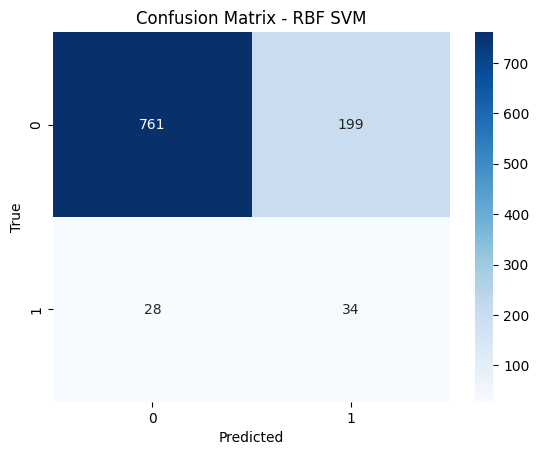

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RBF SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Training and Evaluating Decision Tree
A **Decision Tree classifier** with **Gini impurity** and maximum depth of 5 is trained on the balanced training data.  
Predictions on the test set are stored in **y_pred_DT**.  

Model performance is evaluated using **accuracy, precision, recall**, and a **classification report** to assess its ability to predict stroke cases.

In [32]:
DT = DecisionTreeClassifier(criterion='gini',max_depth = 5)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
# Evaluate
print("\n=== Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))


=== Decision Tree Performance ===
Accuracy: 0.7935420743639922
Precision: 0.17180616740088106
Recall: 0.6290322580645161

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       960
           1       0.17      0.63      0.27        62

    accuracy                           0.79      1022
   macro avg       0.57      0.72      0.57      1022
weighted avg       0.92      0.79      0.84      1022



### Training and Evaluating Random Forest
A **Random Forest classifier** with 30 trees, Gini impurity, and maximum depth of 5 is trained on the balanced training data.  
Predictions on the test set are stored in **y_pred_RF**.  

Performance is evaluated using **accuracy, precision, recall**, and a **classification report** to compare with other models and assess its effectiveness in predicting stroke cases.

In [33]:
RF = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5)
RF.fit(X_train, y_train)
y_pred_RF = DT.predict(X_test)
# Evaluate
print("\n=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Precision:", precision_score(y_test, y_pred_RF))
print("Recall:", recall_score(y_test, y_pred_RF))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RF))


=== Random Forest Performance ===
Accuracy: 0.7935420743639922
Precision: 0.17180616740088106
Recall: 0.6290322580645161

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       960
           1       0.17      0.63      0.27        62

    accuracy                           0.79      1022
   macro avg       0.57      0.72      0.57      1022
weighted avg       0.92      0.79      0.84      1022



### Model Selection with Justification

The **Linear SVM** is selected as the final model because **recall for the stroke class is the highest (0.76)** among all models tested.  
- High recall is critical in this context, as it ensures that most actual stroke cases are correctly identified (Missing a stroke case (false negative) can be dangerous or life-threatening), which is more important than overall accuracy in healthcare applications.  
- Although the overall accuracy (0.75) and precision (0.16) are slightly lower than tree-based models, the model effectively detects the minority class, making it better suited for this predictive task.  

The classification report confirms this choice: the model correctly identifies a large proportion of stroke cases (minority class) while maintaining reasonable performance on the non-stroke class.

### Model Performance Analysis

The performance metrics of the trained models are **not very high**, which may seem low compared to ideal benchmarks (>0.9).  
After applying class balancing (e.g., SMOTE), metrics dropped to around 0.75, but this is more **realistic and reliable**:  
- The model now correctly identifies a larger proportion of stroke cases (minority class).  
- Balancing the classes ensures the model **learns patterns from both classes**, rather than being biased toward the majority class.
Even if metrics like accuracy decrease after balancing, the model becomes **clinically more useful**, as it can detect the minority class more effectively, which is crucial in healthcare applications like stroke prediction.

**Suggestions to improve performance:**
1. **Collect more data** for the minority class (stroke cases) to balance the dataset. It can provide more data patterns in stroke cases.  
2. **Use advanced resampling techniques** like SMOTE variants or ADASYN to generate more realistic synthetic samples.  
3. **Try ensemble methods** such as XGBoost or Balanced Random Forest, which handle imbalanced data better.  
4. **Tune model hyperparameters** (C, gamma for SVM; depth, n_estimators for trees/forest) using cross-validation.  
5. **Experiment with class weighting** to penalize misclassifying the minority class more heavily.  
6. **Feature engineering**: create new relevant features or select the most informative features to improve signal for the model.